<a href="https://colab.research.google.com/github/Hefajtur/ML/blob/main/Cluster.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from sklearn.cluster import KMeans
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from matplotlib import pyplot as plt

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/csv/income.csv")
df.head()

,Name,Age,Income
0,Rob,27,7000
1,Michel,29,9000
2,Mohan,29,6100
3,Ismail,28,6000
4,Kory,42,15000


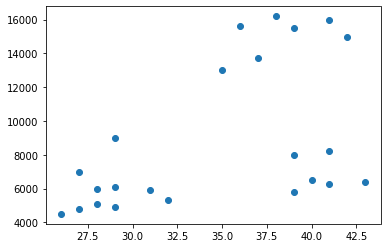

In [ ]:
plt.scatter(df['Age'],df['Income'])

In [ ]:
km = KMeans(n_clusters=3)
km

KMeans(n_clusters=3)

In [ ]:
y_predicted = km.fit_predict(df[['Age','Income']])
y_predicted

array([0, 0, 2, 2, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 2,
       2], dtype=int32)

In [ ]:
df['cluster'] = y_predicted
df.head()

,Name,Age,Income,cluster
0,Rob,27,7000,0
1,Michel,29,9000,0
2,Mohan,29,6100,2
3,Ismail,28,6000,2
4,Kory,42,15000,1


No handles with labels found to put in legend.


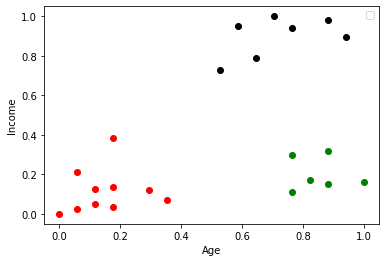

In [ ]:
df1 = df[df.cluster==0]
df2 = df[df.cluster==1]
df3 = df[df.cluster==2]
plt.scatter(df1.Age,df1['Income'],color='green')
plt.scatter(df2.Age,df2['Income'],color='red')
plt.scatter(df3.Age,df3['Income'],color='black')
plt.xlabel('Age')
plt.ylabel('Income')
plt.legend()
plt.show()

In [ ]:
scaler = MinMaxScaler()
scaler.fit(df[['Income']])
df[['Income']] = scaler.transform(df[['Income']])
scaler.fit(df[['Age']])
df[['Age']] = scaler.transform(df[['Age']])
df

,Name,Age,Income,cluster
0,Rob,0.058824,0.213675,0
1,Michel,0.176471,0.384615,0
2,Mohan,0.176471,0.136752,2
3,Ismail,0.117647,0.128205,2
4,Kory,0.941176,0.897436,1
5,Gul,0.764706,0.940171,1
6,David,0.882353,0.982906,1
7,Andy,0.705882,1.000000,1
8,Brad,0.588235,0.948718,1
9,Anna,0.529412,0.726496,1


In [ ]:
km = KMeans(n_clusters=3)
y_predicted = km.fit_predict(df[['Age','Income']])
y_predicted

array([1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0,
       1], dtype=int32)

In [ ]:
df['cluster'] = y_predicted
df.drop('cluster', axis='columns')
df

,Name,Age,Income,cluster
0,Rob,0.058824,0.213675,1
1,Michel,0.176471,0.384615,1
2,Mohan,0.176471,0.136752,1
3,Ismail,0.117647,0.128205,1
4,Kory,0.941176,0.897436,2
5,Gul,0.764706,0.940171,2
6,David,0.882353,0.982906,2
7,Andy,0.705882,1.000000,2
8,Brad,0.588235,0.948718,2
9,Anna,0.529412,0.726496,2


In [ ]:
km.cluster_centers_

array([[0.85294118, 0.2022792 ],
       [0.15294118, 0.11623932],
       [0.72268908, 0.8974359 ]])

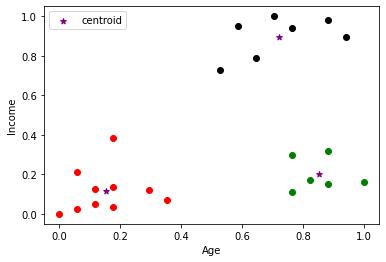

In [ ]:
df1 = df[df.cluster==0]
df2 = df[df.cluster==1]
df3 = df[df.cluster==2]
plt.scatter(df1.Age,df1['Income'],color='green')
plt.scatter(df2.Age,df2['Income'],color='red')
plt.scatter(df3.Age,df3['Income'],color='black')
plt.xlabel('Age')
plt.ylabel('Income')
plt.scatter(km.cluster_centers_[:,0], km.cluster_centers_[:,1],color='purple',marker='*',label='centroid')
plt.legend()

In [ ]:
k_rng = range(1,10)
sse = []
for k in k_rng:
  km = KMeans(n_clusters=k)
  km.fit(df[['Age','Income']])
  sse.append(km.inertia_)

In [ ]:
sse

[5.554204561576309,
 2.113976516973999,
 0.4979184781302311,
 0.37194483771687814,
 0.2851941544086577,
 0.2273433792006531,
 0.1720423689193097,
 0.14079534389030735,
 0.10754001626003518]

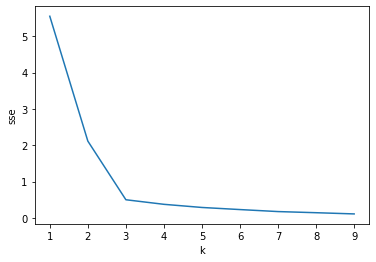

In [ ]:
plt.xlabel('k')
plt.ylabel('sse')
plt.plot(k_rng,sse)